<a href="https://colab.research.google.com/github/oxfordfictionary/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
#Imports
from scipy.stats import chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# bash to get data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-02 23:03:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-02-02 23:03:10 (610 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [43]:
# make into a dataframe
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


# **4. Chi-Square using Scipy & Numpy**

In [155]:
''' Scipy here'''
#Looking to see if party correlates with vote y or n on education
EdVote = pd.crosstab(df['party'], df['education'], margins=True)

#p-value shows there is a divergence between the two

Power_divergenceResult(statistic=600.9294554455446, pvalue=1.4770642190059481e-124)

In [157]:
stats.chi2_contingency(EdVote)

(206.49018306296443,
 1.5110612872679885e-43,
 4,
 array([[143.60643564, 105.39356436, 249.        ],
        [ 89.39356436,  65.60643564, 155.        ],
        [233.        , 171.        , 404.        ]]))

In [0]:
''' Numpy below '''

In [147]:
#this variable was called X-table in lecture notes
print(EdVote)

education     n    y  All
party                    
democrat    213   36  249
republican   20  135  155
All         233  171  404


In [149]:
row_sums = EdVote.iloc[0:2, 2].values
col_sums = EdVote.iloc[2, 0:2].values
print(row_sums)
col_sums

[249 155]


array([233, 171])

In [150]:
total = EdVote.loc['All', 'All']
total

404

In [0]:
# making expected values
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)


In [152]:
#setting our sample data
observed = pd.crosstab(df['party'], df['education']).values
observed

array([[213,  36],
       [ 20, 135]])

In [153]:
chi_squared_stat = ((observed - expected)**2/(expected)).sum()
chi_squared_stat

206.49018306296443

In [154]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)
dof = (len(row_sums)-1)*(len(col_sums)-1)
dof

# Calculate Degrees of Freedom


1

# **1. Generate and numerically represent a confidence interval**

In [0]:
#setting edvote to array
EdVoteNP = np.array(EdVote)


In [0]:
#come up with means
''' original code from lecture
sample_means=[]
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  sample_means.append(coinflips.mean())
print(len(sample_means))
'''
#my code below
EdMean = []
for rows in EdVoteNP:
  SmolVoteMean = sum(rows) / len(rows)
  EdMean.append(SmolVoteMean)

In [0]:
from scipy.stats import t
# Sample Size
n = len(EdMean)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
big_mean = np.mean(EdMean)
# Sample Standard Deviation
sample_std = np.std(EdMean, ddof=1)
# Standard Error
std_err = sample_std/n**.5


In [141]:
CI = t.interval(.95, dof, loc=big_mean, scale=std_err)
CI

(-28.68001733668521, 387.79112844779627)

# **Another CI below**


In [75]:
#setting up data, as yays or nays for one party

subset = df[((df['party'] == 'republican') & (df['education']))]
subset = subset.replace({'y': 1, 'n': 0})
subset.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1,0.0,0.0,0.0,1.0,NaN,1,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0
14,republican,0.0,1.0,0.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN,0.0,NaN


In [83]:
#removing nans and converting to array
subset2 = subset.dropna(axis=0)
#I decided party is actually not helpful here
subset3 = subset2.drop(['party'], axis=1)
Votes = np.array(subset3)
print(Votes)

[[0. 1. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]]


In [104]:
# realized that below multiple lines of tuples don't work for graphing, reduced 
#to new variable SmolVotes, see below
SmolVotes.mean()

0.5

In [0]:
# setting up confidence interval function
import scipy.stats as stats

#This function is designed for degrees of freedom, ddof, of 1. 
# using DOC STRING from assignment
"""
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
"""
def confidence_interval(data, confidence=0.95):
    data_array = np.array(data) 
    data_mean = np.mean(data)
    n = len(data) 
    stderr = np.std(data_array, ddof=1)/np.sqrt(n) # calculating standard error
    moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1) # look up the corresponding tstat with stats.t.ppf, moe = margin of error
    return (data_mean, data_mean - moe, data_mean + moe)

In [105]:
confidence_interval(SmolVotes)

(0.5, 0.22483104689224587, 0.7751689531077541)

# **2. Graphically (with a plot) represent the confidence interval**

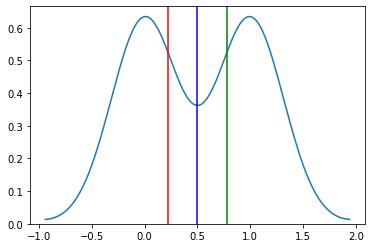

In [109]:
#plotting with seaborn; realized multiple tuples don't work, reduced it to the
#first line of the np array

SmolVotes = Votes[0]
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(SmolVotes)
CI = confidence_interval(SmolVotes)
plt.axvline(x=CI[1], color = 'r' )
plt.axvline(x=CI[2], color = 'g' )
plt.axvline(x=CI[0], color = 'b' );

# **3. Interpret the confidence interval - what does it tell you about the data and its distribution?**
This is a bimodal distribution which reflects the binary nature of the data. It looks surprisingly even; this most have been a vote in which republicans who votes were even split on yays and nays. 

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).

**The chi-square analysis of frequency of yes or no votes on the education bill between Republicans and Democrats suggests there is a significant difference between support for this bill along party lines (p < 0.5, CI95% = 206.49). This test excluded counts of voters who abstained.**

2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)